In [1]:
import sys
import random
import matplotlib
from QUEEN.queen import * 
from QUEEN import cutsite as cs
from QUEEN.qexperiment import pcr, homology_based_assembly, digestion, ligation, gateway_reaction, primerdesign
matplotlib.rcParams['font.sans-serif'] = ["Helvetica", "Arial", "Lucida Sans", "DejaVu Sans", "Lucida Grande", "Verdana"]
matplotlib.rcParams['font.family']     = 'sans-serif'

## Gateway Cloning
Gateway cloning is a highly efficient alternative to restriction cloning and does not require the use of restriction enzymes. Instead, an insert is moved into a vector through a two-step recombination process that takes advantage of integration and excision reactions using attachment sites attL and attB. The first step—a BP reaction—creates an entry clone containing the DNA insert flanked by two attL sites. The second step—an LR reaction—creates an expression clone containing the DNA insert flanked by two attB sites. Multisite Gateway cloning allows up to four fragments to be inserted simultaneously [(ref)](https://www.snapgene.com/guides/gateway-cloning).

In the example Gateway Cloning process, 
1. The eGFP gene was amplified by PCR using a primer pair holding attB1/B2 adapters.
2. The eGFP amplicon was inserted into the region between the attL1 and attL2 sites of the pDONR221 vector.

In [2]:
pDONR = QUEEN(record="https://benchling.com/s/seq-firszn2z0eHWgzfdus5c?m=slm-5OmpvGSHNeTHKTNA1H67", project="pDONR221", dbtype="benchling") 
egfp  = QUEEN(record="https://benchling.com/s/seq-xhW4nsjXvwWqCPBKAVgk?m=slm-6TV0zj2Jo38Zdyb1cjtm", project="mEGFP", dbtype="benchling") 

In [3]:
primer_pair   = primerdesign(egfp, egfp[:-3], fw_adapter="attB", rv_adapter="attB")[0]  #To remove stop codon, egfp[:-3] was specified.
egfp_amplicon = pcr(egfp, primer_pair["fw"], primer_pair["rv"], product="egfp_amplicon")

In [4]:
gateway_construct = gateway_reaction(pDONR, egfp_amplicon, mode="BP", product="gateway_construct")
#gateway_construct.outputgbk("gateway_construct.gbk") 

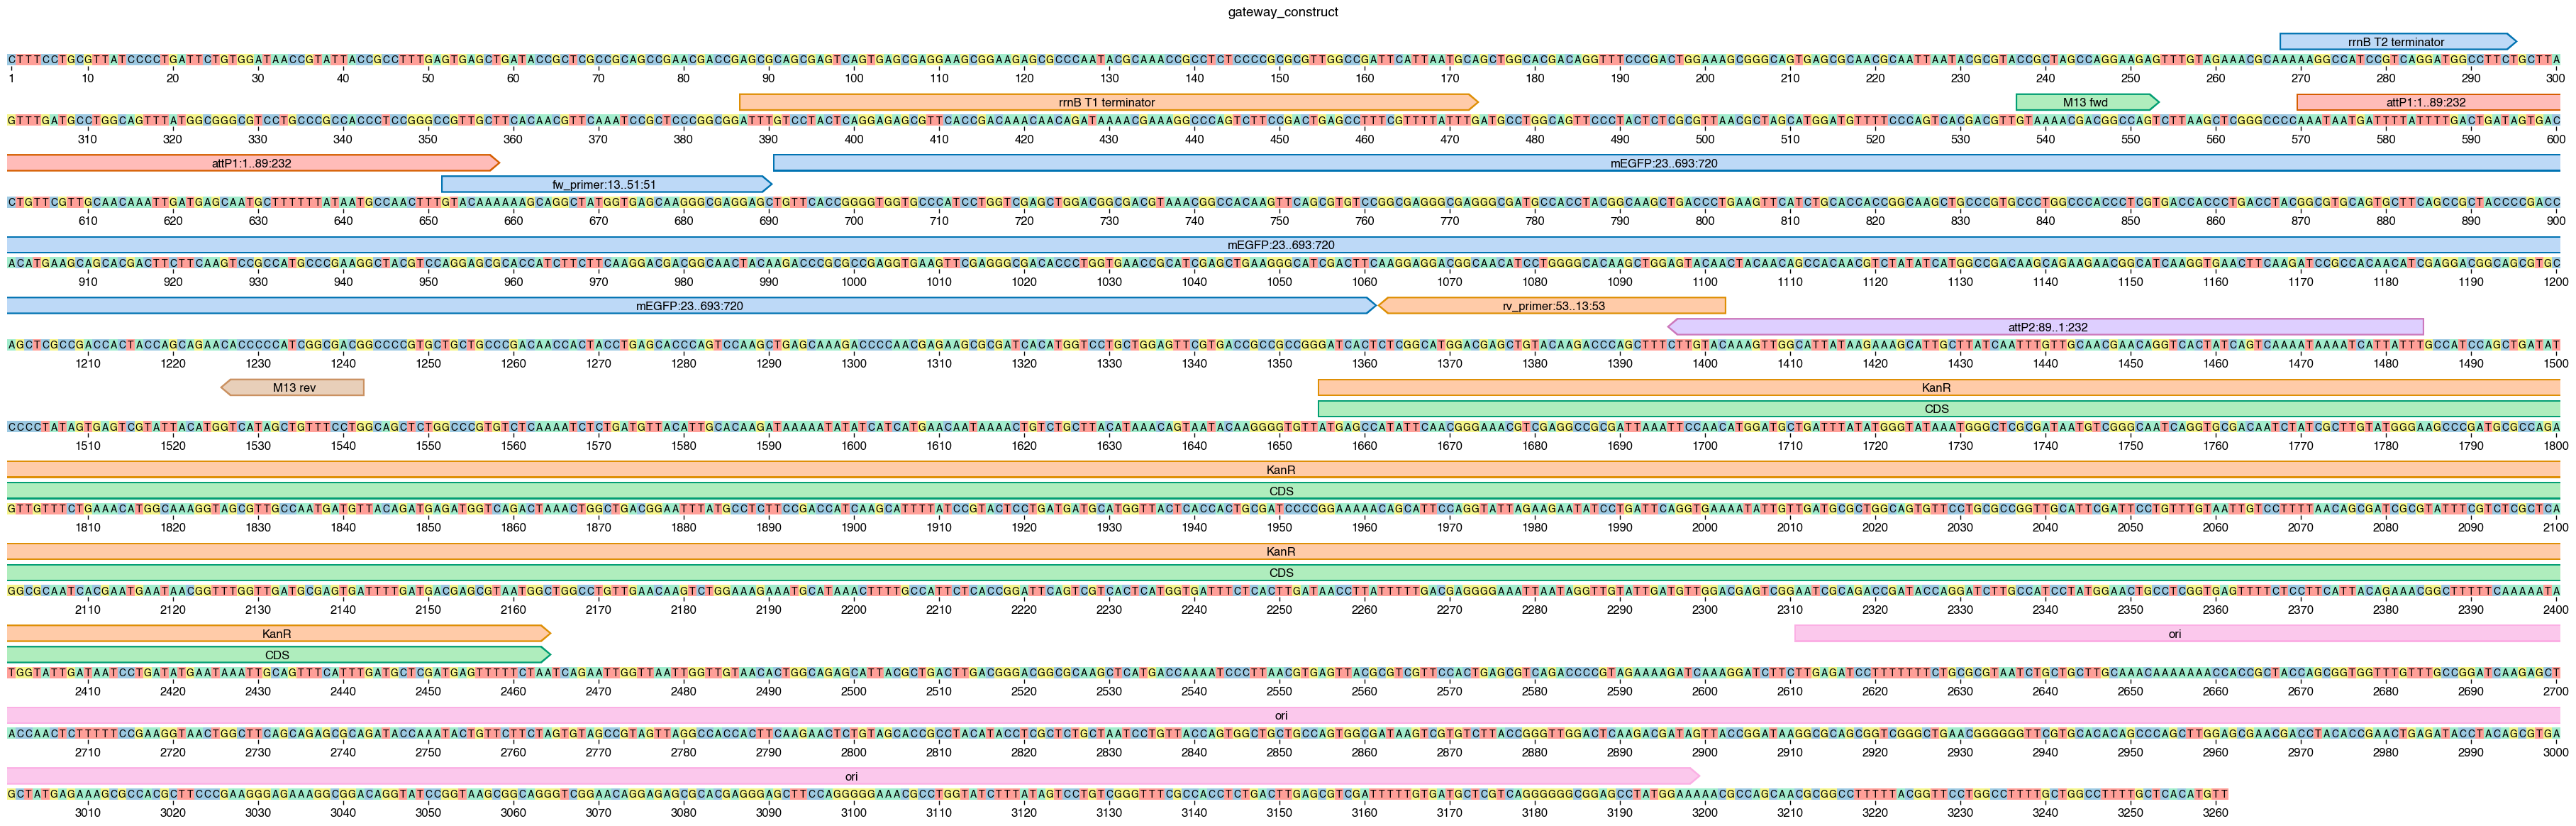

In [5]:
fig = visualizemap(gateway_construct, tick_interval=10, seq=True, linebreak=300) 

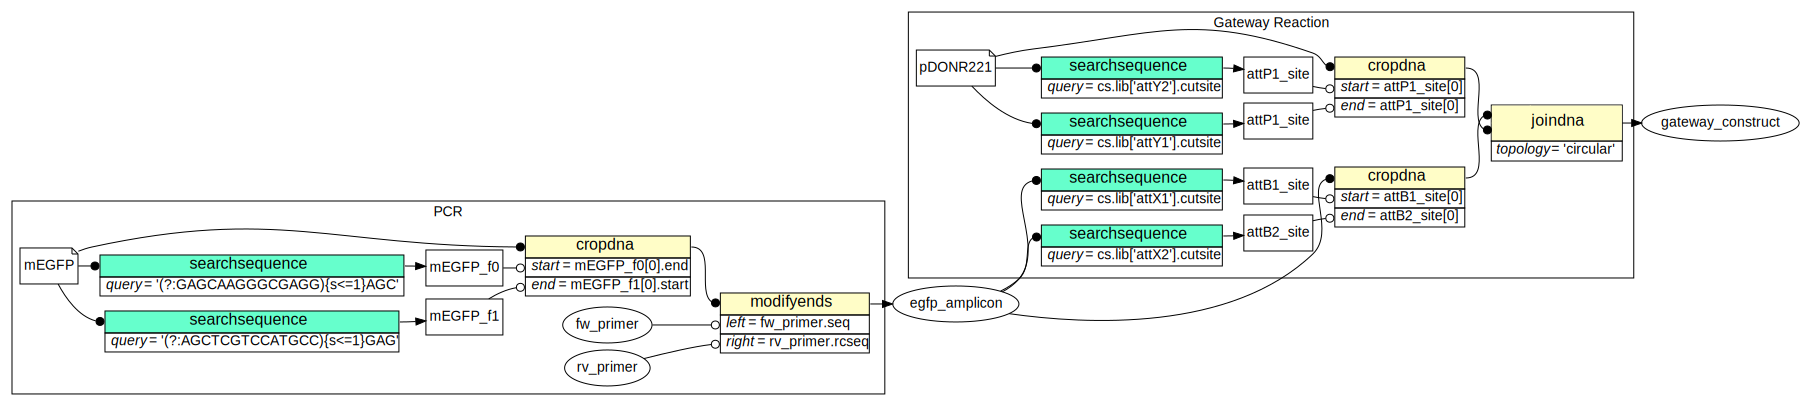

In [6]:
visualizeflow(gateway_construct) 